In [ ]:

from src.grid_simulation.grid import SimGrid

In [ ]:
grid = SimGrid()

In [ ]:
grid.set_prosumer_loads_w([12500]*12 + [0], [0] * 13)
grid.run_powerflow()
print(grid.grid.res_trafo.loading_percent[0])

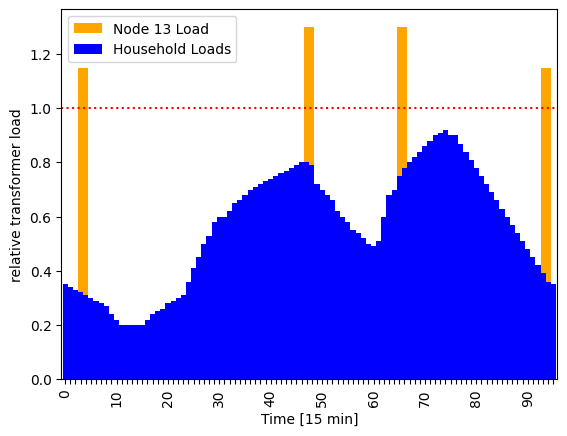

In [39]:
import seaborn as sns
import csv
from collections import deque
from copy import deepcopy
import pandas as pd
import matplotlib.patches as mpatches
import seaborn.objects as so

data = [ 0.35,
  0.34,
  0.33,
  0.32,
  0.31,
  0.30,
  0.29,
  0.28,
  0.27,
  0.24,
  0.22,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.22,
  0.24,
  0.25,
  0.26,
  0.28,
  0.29,
  0.30,
  0.31,
  0.36,
  0.41,
  0.45,
  0.50,
  0.53,
  0.58,
  0.6,
  0.6,
  0.62,
  0.65,
  0.66,
  0.68,
  0.7,
  0.71,
  0.72,
  0.73,
  0.74,
  0.75,
  0.76,
  0.77,
  0.78,
  0.79,
  0.8,
  0.8,
  0.79,
  0.72,
  0.7,
  0.68,
  0.66,
  0.62,
  0.6,
  0.58,
  0.55,
  0.54,
  0.52,
  0.5,
  0.49,
  0.51,
  0.6,
  0.68,
  0.7,
  0.75,
  0.78,
  0.8,
  0.82,
  0.84,
  0.86,
  0.88,
  0.9,
  0.91,
  0.92,
  0.9,
  0.9,
  0.87,
  0.84,
  0.81,
  0.78,
  0.75,
  0.72,
  0.69,
  0.66,
  0.63,
  0.60,
  0.57,
  0.54,
  0.51,
  0.48,
  0.45,
  0.42,
  0.39,
  0.36,
  0.35
]

extra_load = [0] * 96

extra_load[3] = 1.15 - data[3]
extra_load[4] = 1.15 - data[4]

extra_load[47] = 1.3 - data[47]
extra_load[48] = 1.3 - data[48]

extra_load[65] = 1.3 - data[65]
extra_load[66] = 1.3 - data[66]

extra_load[93] = 1.15 - data[93]
extra_load[94] = 1.15 - data[94]

total_load = [data[i] + extra_load[i] for i in range(96)]

plot_data = pd.DataFrame({
  "time": list(range(96)),
  "Household Loads": data,
  "induced": extra_load,
  "Node 13 Load": total_load
})


colors = ["lightblue", "red"]
# fig = sns.barplot(plot_data, x="time", y="total_load", hue="induced congestion")
# bar_2 = sns.barplot(plot_data, x="time", y="induced congestion")

w = 1

ax = plot_data.plot(x="time", y="Node 13 Load", kind="bar", color="orange", width=w)
plot_data.plot(x="time", y="Household Loads", kind="bar", ax=ax, color="blue", width=w)

ax.axhline(1.0, color='red', ls='dotted')
ax.set(xlabel="Time [15 min]")
ax.set(ylabel="relative transformer load")

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
